# Beyond Ping Pong
This notebook contains a possible thing to look at during the Heidelberg Workshop

The fundamental idea is that we can use techniques from weather forecasting to 'post-process' a near-term future projection, by considering the past millennium as a kind of hindcast.

In [1]:
import xarray as xr
import matplotlib as plt
import pandas as pd

In [5]:
# Load in the Last Millennium Reanalysis (anomalies w.r.t. 1951-1980)
lmr=xr.open_dataset("data\LastMillenniumReanalysis_gmt_MCruns_ensemble_full.nc")
lmr_gmt=lmr.gmt.mean(("members","MCrun")) # Compute ensemble mean, annual mean values
lmr_gmt.rolling(time=30,center=True).mean() # Perform 30 year running mean
lmr_samples=lmr_gmt[865::15]
lmr_samples

<xarray.DataArray 'gmt' (time: 76)>
array([-0.16105814, -0.02391402, -0.03660967, -0.1200605 , -0.07085254,
       -0.29542762, -0.13681065, -0.09887689, -0.11952046, -0.12005015,
       -0.08713655, -0.0021303 , -0.16821967, -0.1436989 , -0.15299858,
       -0.17942514, -0.13485928, -0.1095963 , -0.09038387, -0.26078242,
       -0.04265145, -0.15708296,  0.00862425,  0.00111973, -0.02359382,
       -0.11654582, -0.01439272, -0.03848375, -0.06060924, -0.14429736,
       -0.10093573, -0.08678614, -0.16209444, -0.21997748, -0.17952052,
       -0.12383295, -0.11778878, -0.10732859,  0.00196352, -0.06272512,
       -0.18554166, -0.13477641, -0.1890552 , -0.06998184, -0.19258028,
       -0.14145197, -0.10041075, -0.08804782, -0.22983511, -0.14031588,
       -0.10675056, -0.12721242, -0.24448255, -0.06335621, -0.1489761 ,
       -0.08648183, -0.13204257, -0.01448531, -0.12983318, -0.13955478,
       -0.03497154, -0.10960163,  0.0110668 , -0.209804  , -0.03045789,
       -0.15917791, -0.12276164, -0.09117417, -0.07661192, -0.22365375,
       -0.17373782, -0.03378014,  0.0753492 ,  0.04707989, -0.00379655,
        0.38460702], dtype=float32)
Coordinates:
  * time     (time) object 0865-01-01 00:00:00 ... 1990-01-01 00:00:00

In [17]:
lme=xr.open_dataset("data\CESM1_LastMillenniumEnsemble.001-010.tas_global_avg_mon.850-2005.nc")
lme_gmt_mon=lme.tas_global_avg_mon #Load in monthly global mean temperatures
lme_5180 = lme_gmt_mon.sel(time=slice("1951-01", "1980-12")).mean() # Compute the average over L.M.Reanalysis baseline
lme_gmt = lme_gmt_mon.groupby("time.year").mean()
lme_gmt_mon = lme_gmt_mon.rolling(time=30*12,center=True).mean() # Perform 30 year running mean
lme_samples=lme_gmt_mon[:,180:13690:180]
lme_samples=lme_samples-lme_5180
lme_gmt

<xarray.DataArray 'tas_global_avg_mon' (record: 10, year: 1156)>
array([[0.1198381 , 0.3904111 , 0.36505905, ..., 0.5848511 , 0.56194574,
        0.57666326],
       [0.11064947, 0.2568973 , 0.17207913, ..., 0.4697264 , 0.46567318,
        0.44605836],
       [0.1778479 , 0.36125347, 0.36925945, ..., 0.32920364, 0.44064608,
        0.49654713],
       ...,
       [0.10358415, 0.22163755, 0.40835115, ..., 0.37098363, 0.37343633,
        0.39312184],
       [0.21263069, 0.35289216, 0.21307333, ..., 0.559429  , 0.9035407 ,
        0.7264754 ],
       [0.06047846, 0.15022229, 0.2695093 , ..., 0.4130907 , 0.48773238,
        0.64671725]], dtype=float32)
Coordinates:
  * year     (year) int64 850 851 852 853 854 855 ... 2001 2002 2003 2004 2005
Dimensions without coordinates: record

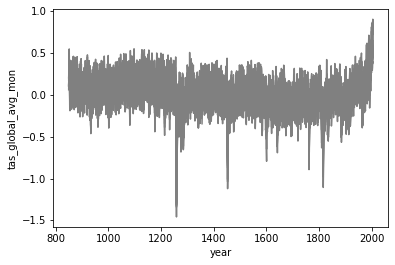

In [18]:
#lmr_gmt.plot()
for i in range(0, 10):
    this_line=lme_gmt[i,:]
    this_line.plot(color='grey')


In [22]:
lme.time

<xarray.DataArray 'time' (time: 13872)>
array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.3869e+04, 1.3870e+04,
       1.3871e+04])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 1.387e+04 1.387e+04 1.387e+04
Attributes:
    units:          months since 850-01-15 00:00:00
    calendar:       standard
    long_name:      Time
    standard_name:  time
    actual_range:   [    0. 13871.]